In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
# Imports
import tensorflow as tf
import numpy as np
from arc_code.data import get_data
import math
import matplotlib.pyplot as plt
import itertools

In [88]:
# getting the data
X_train, Y_train, X_test, Y_test, files = get_data('../data', training_set = True, grouped_by_problem = True)

In [87]:
len(X_train)

400

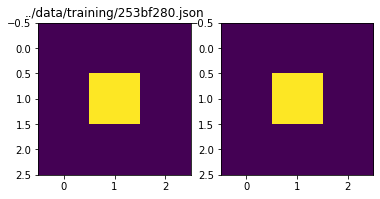

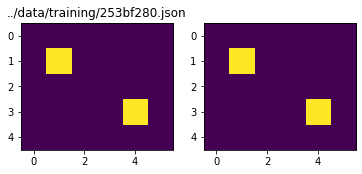

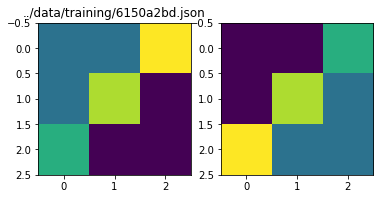

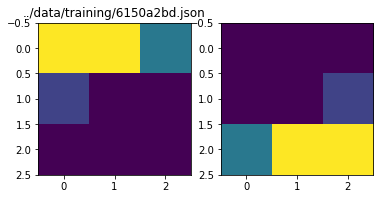

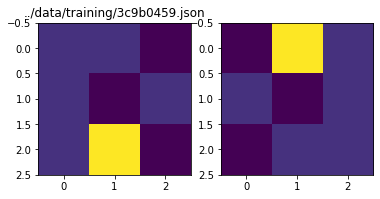

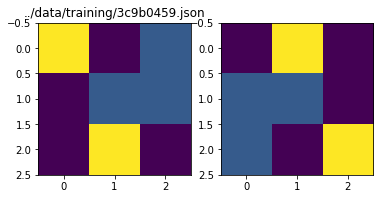

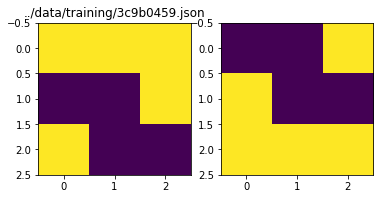

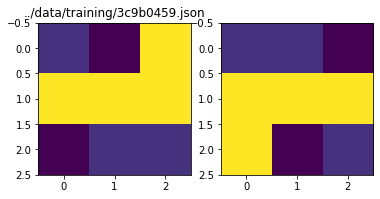

In [105]:
for i,x_arr in enumerate(X_train):
    for j,x in enumerate(x_arr):
        if np.array_equal(x, np.rot90(np.rot90(Y_train[i][j]))):
            _, ax = plt.subplots(1,2)
            ax[0].imshow(x)
            ax[1].imshow(Y_train[i][j])
            ax[0].set_title(files[i])
            

In [155]:
def set_color_as_left_neigbor(x, row,col):
    if col != 0:
        x[row,col] = x[row,col-1]
    return x

In [162]:
Actions = {
    (lambda x : np.rot90(x)) : 'grid',
    set_color_as_left_neigbor : 'grid,row,col',
}

In [161]:
def expand_actions(grid):
    all_actions = []
    for key,value in Actions.items():
        if value == 'grid':
            all_actions.append(key(grid))
        elif value == 'grid,row,col':
            for r in range(grid.shape[0]):
                for c in range(grid.shape[1]):
                    all_actions.append(key(grid,r,c))
    return all_actions

In [164]:
alls = []
for i in (expand_actions(X_train[251][0])):
    alls.extend(expand_actions(i))
len(alls)    

100

In [116]:
def get_all_possible_actions(num_moves):
    
    return [p for p in itertools.product(Actions, repeat=num_moves)]

In [101]:
def evaluate(y_true, y_pred, method = 'pixel_level'):
    if method=='pixel_level':
        loss = 0
        max_height = max(y_true.shape[0],y_pred.shape[0])
        max_width = max(y_true.shape[1],y_pred.shape[1])
        for r in range(max_height):
            for c in range(max_width):
                try:
                    if y_true[r,c] != y_pred[r,c]:
                        loss += 1
                except IndexError:
                    loss += 1
    return loss

In [ ]:
def test_apply(grid, action_combo):
    if len(action_combo) = 0:
        return grid
    grid = action_combo[0](grid)

In [70]:
def apply_action_combo(grid, action_combo):
    for action in action_combo:
        grid = action(grid)
    return grid

In [117]:
def check_actions(x,y, num_moves):
    best_action_combo = None
    best_loss = 10000000
    all_action_permutations = get_all_possible_actions(num_moves)
    for action_list in all_action_permutations:
        for i,action in enumerate(action_list):
            x = action(x)
            loss = evaluate(x,y)
            if loss == 0:
                # got the right answer
                return action_list[:i+1],0
            if loss < best_loss:
                best_loss = loss
                best_action_combo = action_list
    return best_action_combo, best_loss

In [124]:
num_correct = 0
for problem_num in range(len(X_train)):
    x_problem, y_problem = X_train[problem_num], Y_train[problem_num]
    best_action_combo = None
    for i in range(len(x_problem)):
        x_arr, y_arr = x_problem[i], y_problem[i]
        action_combo, loss = check_actions(x_arr,y_arr, 3)
        if loss == 0:
            if best_action_combo is None:
                best_action_combo = action_combo
            #else:
            #    print(action_combo, best_action_combo)
            #    assert action_combo == best_action_combo
    if best_action_combo is not None:   
        test_is_correct = True
        for (inp_grid, out_grid) in zip(X_test[problem_num],Y_test[problem_num]):
            predicted_y = apply_action_combo(inp_grid, best_action_combo)
            if evaluate(predicted_y, out_grid) != 0:
                test_is_correct = False
        if test_is_correct:
            print(problem_num, files[problem_num], best_action_combo)
            num_correct += 1

251 ../data/training/6150a2bd.json (<function <lambda> at 0x7fa41b8f5710>, <function <lambda> at 0x7fa41b8f5710>)
283 ../data/training/3c9b0459.json (<function <lambda> at 0x7fa41b8f5710>, <function <lambda> at 0x7fa41b8f5710>)
343 ../data/training/ed36ccf7.json (<function <lambda> at 0x7fa41b8f5710>,)


In [125]:
num_correct

3